Valet Data Columns: Index(['date', 'STATIC_ATABLE_V41690973', nan], dtype='object', name=2)


[*********************100%***********************]  1 of 1 completed

Valet Data Columns: Index(['date', 'BD.CDN.3YR.DQ.YLD', nan], dtype='object', name=2)


Valet Data Columns: Index(['date', 'V39079', nan], dtype='object', name=2)


<Figure size 1400x800 with 0 Axes>

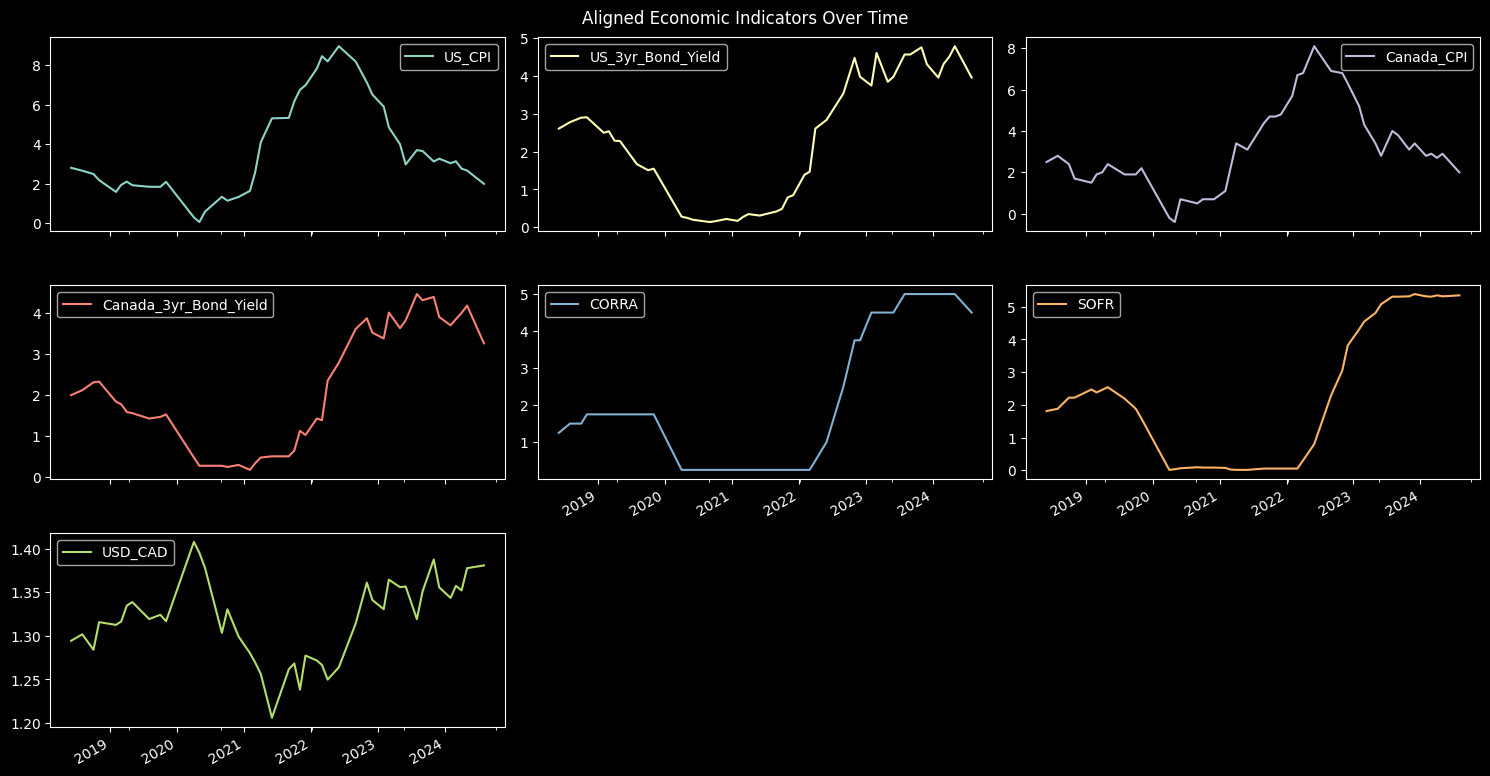

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from fredapi import Fred
from pyvalet import ValetInterpreter
import yfinance as yf
import statsmodels.api as sm
import numpy as np

plt.style.use('dark_background')
plt.figure(figsize=(14, 8))

# Initialize FRED and Valet API instances
fred = Fred(api_key='Enter Your Key')

vi = ValetInterpreter()

# Define date range
start_date = '2018-05-21'
end_date = '2024-10-31'

# Define functions for pulling data from APIs
def get_fred_series(series_id, start=start_date, end=end_date):
    """Retrieve data from FRED by series ID."""
    return fred.get_series(series_id, start, end)

def get_valet_series(series_id):
    """Retrieve data from Valet API by series ID and ensure date index."""
    df = vi.get_series_observations(series_id, response_format='csv')
    
    # Inspect columns to identify the date and value columns
    print("Valet Data Columns:", df.columns)  # Check column names for troubleshooting
    
    # Assuming the date is in the first column and the value in the second
    df = df.iloc[:, [0, 1]]  # Select only the first two columns
    df.columns = ['Date', 'Value']
    
    # Convert Date column to datetime and Value to numeric
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('Date', inplace=True)
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    
    # Drop any rows with NaNs after processing
    return df['Value'].dropna()
def get_usd_cad_exchange():
    """Retrieve USD/CAD exchange rate from Yahoo Finance."""
    return yf.download('CAD=X', start=start_date, end=end_date)['Close'].rename('USD_CAD')

# Pull data for US and Canada
us_cpi = get_fred_series('USACPALTT01CTGYM')
us_3yr_bond = get_fred_series('DGS3')
ca_cpi = get_valet_series('STATIC_ATABLE_V41690973')
ca_3yr_bond = get_valet_series('BD.CDN.3YR.DQ.YLD')
usd_cad = get_usd_cad_exchange()
cad_corra = get_valet_series('V39079')
us_sofr = get_fred_series('SOFR')

# Align dates by concatenating and dropping NaNs
data = pd.concat([us_cpi, us_3yr_bond, ca_cpi, ca_3yr_bond, cad_corra, us_sofr, usd_cad], axis=1)
data.columns = ['US_CPI', 'US_3yr_Bond_Yield', 'Canada_CPI', 'Canada_3yr_Bond_Yield', 'CORRA', 'SOFR', 'USD_CAD']
data = data[start_date:end_date].dropna()

# Plot the aligned data
data.plot(subplots=True, layout=(4, 3), figsize=(15, 10), title="Aligned Economic Indicators Over Time")
plt.tight_layout()
plt.show()

In [20]:
data

,US_CPI,US_3yr_Bond_Yield,Canada_CPI,Canada_3yr_Bond_Yield,CORRA,SOFR,USD_CAD
2018-06-01,2.800613,2.61,2.5,2.00,1.25,1.81,1.29441
2018-08-01,2.651383,2.78,2.8,2.12,1.50,1.88,1.30180
2018-10-01,2.486091,2.90,2.4,2.31,1.50,2.22,1.28406
2018-11-01,2.172538,2.91,1.7,2.33,1.75,2.22,1.31575
2019-02-01,1.576422,2.50,1.5,1.84,1.75,2.47,1.31259
2019-03-01,1.933697,2.54,1.9,1.78,1.75,2.38,1.31643
2019-04-01,2.099331,2.29,2.0,1.59,1.75,2.46,1.33470
2019-05-01,1.916335,2.28,2.4,1.56,1.75,2.54,1.33879
2019-08-01,1.837842,1.67,1.9,1.43,1.75,2.19,1.31930
2019-10-01,1.835372,1.51,1.9,1.47,1.75,1.88,1.32420


Correlation Table:


,US_CPI,US_3yr_Bond_Yield,Canada_CPI,Canada_3yr_Bond_Yield,CORRA,SOFR,USD_CAD
US_CPI,1.00,0.17,0.97,0.23,-0.02,-0.10,-0.50
US_3yr_Bond_Yield,0.17,1.00,0.35,0.99,0.93,0.93,0.48
Canada_CPI,0.97,0.35,1.00,0.41,0.15,0.08,-0.37
Canada_3yr_Bond_Yield,0.23,0.99,0.41,1.00,0.93,0.92,0.46
CORRA,-0.02,0.93,0.15,0.93,1.00,0.99,0.61
SOFR,-0.10,0.93,0.08,0.92,0.99,1.00,0.61
USD_CAD,-0.50,0.48,-0.37,0.46,0.61,0.61,1.00


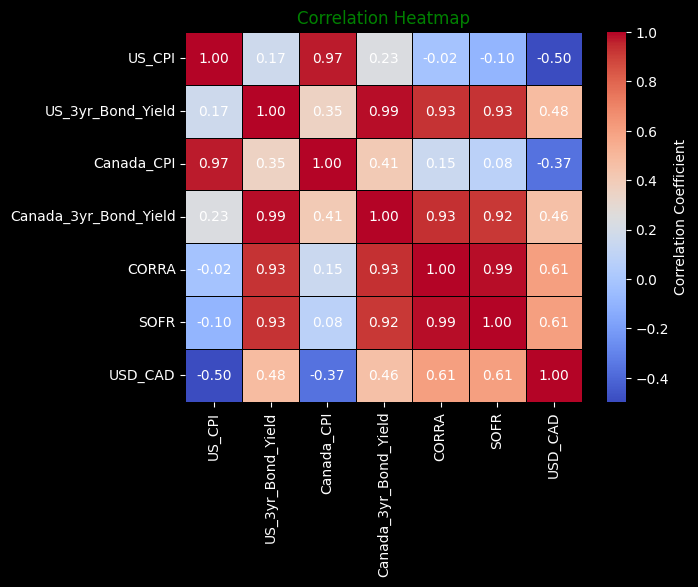

In [21]:
correlation_matrix = data.corr()

# Display styled correlation table
print("Correlation Table:")
styled_corr = correlation_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=2)
display(styled_corr)  # This is for Jupyter Notebook; remove if not applicable



# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", 
            cbar_kws={'label': 'Correlation Coefficient'}, 
            annot_kws={"color": "white"},   # annotation text color
            linecolor='black', linewidths=0.5)  # adds a grid for readability

plt.title('Correlation Heatmap', color='green')
plt.show()

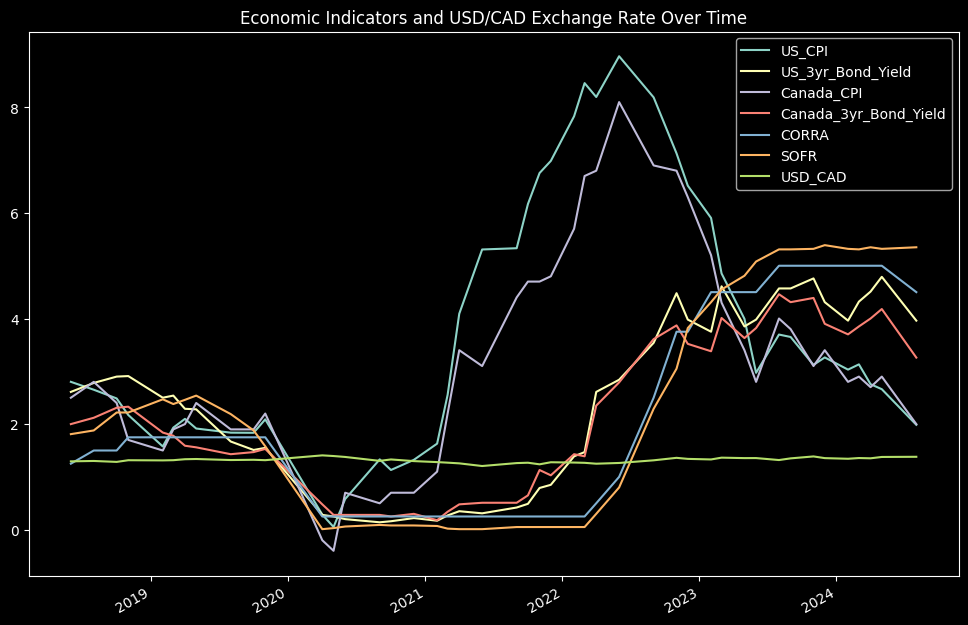

In [22]:
data.plot(figsize=(12, 8), title="Economic Indicators and USD/CAD Exchange Rate Over Time")
plt.show()

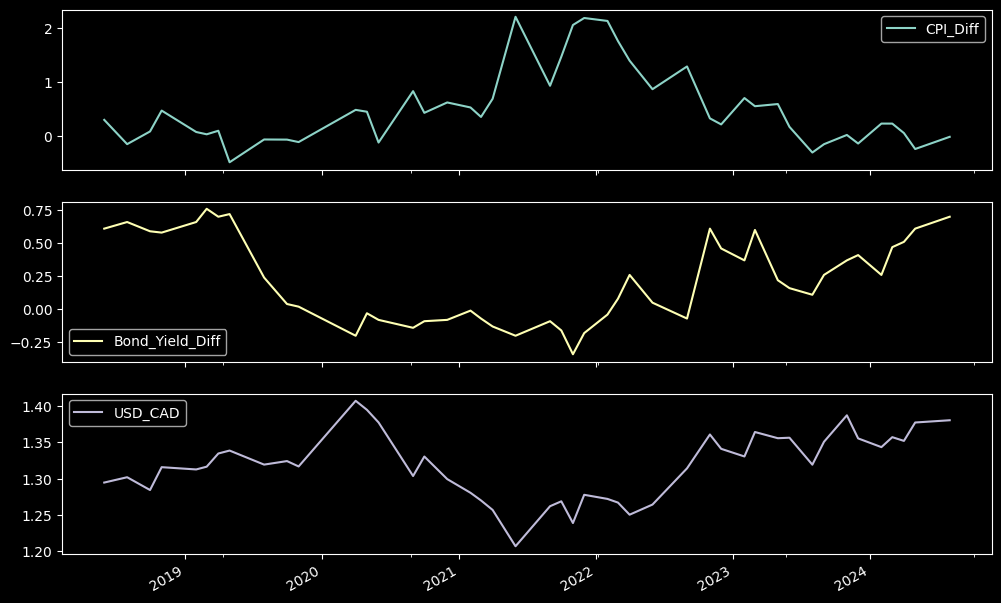

In [23]:
data['CPI_Diff'] = data['US_CPI'] - data['Canada_CPI']
data['Bond_Yield_Diff'] = data['US_3yr_Bond_Yield'] - data['Canada_3yr_Bond_Yield']
data[['CPI_Diff', 'Bond_Yield_Diff', 'USD_CAD']].plot(subplots=True, figsize=(12, 8))
plt.show()

In [24]:
import statsmodels.api as sm

X = data[['CPI_Diff', 'Bond_Yield_Diff']]
y = data['USD_CAD']
X = sm.add_constant(X)  # Adds intercept
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                USD_CAD   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     16.08
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           6.52e-06
Time:                        21:12:46   Log-Likelihood:                 88.017
No. Observations:                  45   AIC:                            -170.0
Df Residuals:                      42   BIC:                            -164.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3393      0.010    135.018      0.000       1.319       1.359
CPI_Diff           -0.0420      0.009     -4.486      0.000      -0.061      -0.023
Bond_Yield_Diff     0.0030      0.020      0.148      0.883      -0.038       0.044
==============================================================================
Omnibus:                        1.435   Durbin-Watson:                   0.796
Prob(Omnibus):                  0.488   Jarque-Bera (JB):                1.408
Skew:                           0.386   Prob(JB):                        0.495
Kurtosis:                       2.608   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

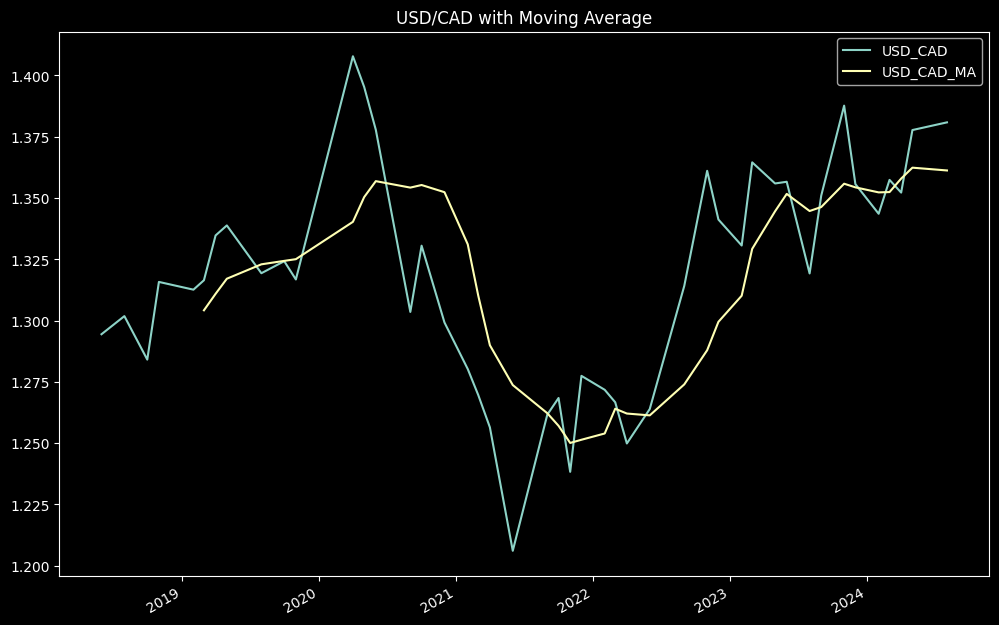

In [25]:
data['USD_CAD_MA'] = data['USD_CAD'].rolling(window=6).mean()  # 6-month moving average
data[['USD_CAD', 'USD_CAD_MA']].plot(figsize=(12, 8), title="USD/CAD with Moving Average")
plt.show()

In [26]:
# Reset the index to make it a column named 'Date'
data = data.reset_index().rename(columns={'index': 'Date'})

# Now proceed with the calculations as before

# 1. Calculate Interest Rate Differential
data['Rate_Differential'] = data['SOFR'] - data['CORRA']

# 2. Generate Trade Signals Based on Rate Differential Widening
data['Signal'] = np.where(data['Rate_Differential'].diff() > 0, 'Buy', 'Sell')

# 3. Calculate Moving Averages for Exit Strategy
data['MA_20'] = data['USD_CAD'].rolling(window=7).mean()  # Short-term moving average
data['MA_50'] = data['USD_CAD'].rolling(window=14).mean()  # Long-term moving average

# 4. Determine Moving Average Crossover Exits
data['Exit_MA_Crossover'] = np.where(
    (data['Signal'] == 'Buy') & (data['MA_20'] < data['MA_50']), 'Exit',
    np.where((data['Signal'] == 'Sell') & (data['MA_20'] > data['MA_50']), 'Exit', None)
)

# 5. ATR Calculation for Trailing Stop
data['High_Low'] = data['USD_CAD'].rolling(window=14).max() - data['USD_CAD'].rolling(window=14).min()
data['ATR'] = data['High_Low'].rolling(window=14).mean()

# Set a trailing stop level (e.g., 1.5 times the ATR)
data['Trailing_Stop'] = np.where(
    data['Signal'] == 'Buy', data['USD_CAD'] - (1.5 * data['ATR']),
    np.where(data['Signal'] == 'Sell', data['USD_CAD'] + (1.5 * data['ATR']), None)
)

# Display the relevant columns
data[['USD_CAD', 'Rate_Differential', 'Signal', 'MA_20', 'MA_50', 'Exit_MA_Crossover', 'Trailing_Stop']]

,USD_CAD,Rate_Differential,Signal,MA_20,MA_50,Exit_MA_Crossover,Trailing_Stop
0,1.29441,0.56,Sell,NaN,NaN,None,NaN
1,1.30180,0.38,Sell,NaN,NaN,None,NaN
2,1.28406,0.72,Buy,NaN,NaN,None,NaN
3,1.31575,0.47,Sell,NaN,NaN,None,NaN
4,1.31259,0.72,Buy,NaN,NaN,None,NaN
5,1.31643,0.63,Sell,NaN,NaN,None,NaN
6,1.33470,0.71,Buy,1.308534,NaN,None,NaN
7,1.33879,0.79,Buy,1.314874,NaN,None,NaN
8,1.31930,0.44,Sell,1.317374,NaN,None,NaN
9,1.32420,0.13,Sell,1.323109,NaN,None,NaN


In [27]:
# Initialize variables for backtesting
initial_balance = 10000  # Starting capital in USD
position = 0  # Position size (1 for long, -1 for short, 0 for no position)
balance = initial_balance  # Track the account balance
returns = []  # To store returns for each trade

# Iterate through each row in the data DataFrame
for i in range(1, len(data)):
    # Entry Conditions
    if data.loc[i - 1, 'Signal'] == 'Buy' and position == 0:  # Enter long
        entry_price = data.loc[i, 'USD_CAD']
        position = 1  # Long position
    elif data.loc[i - 1, 'Signal'] == 'Sell' and position == 0:  # Enter short
        entry_price = data.loc[i, 'USD_CAD']
        position = -1  # Short position

    # Exit Conditions
    if position == 1:  # Long position
        # Check if either the moving average crossover or trailing stop suggests an exit
        if data.loc[i, 'Exit_MA_Crossover'] == 'Exit' or data.loc[i, 'USD_CAD'] < data.loc[i, 'Trailing_Stop']:
            exit_price = data.loc[i, 'USD_CAD']
            trade_return = (exit_price - entry_price) / entry_price  # Calculate return
            returns.append(trade_return)
            balance *= (1 + trade_return)  # Update balance based on return
            position = 0  # Reset position

    elif position == -1:  # Short position
        # Check if either the moving average crossover or trailing stop suggests an exit
        if data.loc[i, 'Exit_MA_Crossover'] == 'Exit' or data.loc[i, 'USD_CAD'] > data.loc[i, 'Trailing_Stop']:
            exit_price = data.loc[i, 'USD_CAD']
            trade_return = (entry_price - exit_price) / entry_price  # Calculate return
            returns.append(trade_return)
            balance *= (1 + trade_return)  # Update balance based on return
            position = 0  # Reset position

# Calculate performance metrics
total_return = (balance - initial_balance) / initial_balance
average_trade_return = sum(returns) / len(returns) if returns else 0
win_rate = sum(1 for r in returns if r > 0) / len(returns) if returns else 0

print(f"Initial Balance: ${initial_balance}")
print(f"Final Balance: ${balance:.2f}")
print(f"Total Return: {total_return * 100:.2f}%")
print(f"Average Trade Return: {average_trade_return * 100:.2f}%")
print(f"Win Rate: {win_rate * 100:.2f}%")
print(f"Number of Trades: {len(returns)}")

Initial Balance: $10000
Final Balance: $9369.35
Total Return: -6.31%
Average Trade Return: -0.34%
Win Rate: 5.26%
Number of Trades: 19
